### Part - 1 SpellCheker and Simmilarity Scores

#### Installing the required packages

In [11]:
import PyPDF2
import textract
import docx2txt

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer 

#### Resumes we are going to use during our analysis

In [4]:
resume=docx2txt.process("D:\FullTime-Application\ResumeCollection\CV-SurajPatil-2024.docx")

#### Job Description can be entered by the user

In [5]:
#Prompt for the Job description.
jd = input("Enter the job description: ")  

#### Function to get similarity score between resume and JD with the help of cosine similarity

In [6]:
def get_similarity(resume, jd):
    res = ''.join([i for i in resume if not i.isdigit()])
    res_jd=[res, jd]
    cntv = CountVectorizer()
    count_matrix = cntv.fit_transform(res_jd)
    percentage = round((cosine_similarity(count_matrix)[0][1] * 100),2)
    return percentage

#### Similarity score of first applicant

In [35]:
pip install st-radial


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement st-radial (from versions: none)
ERROR: No matching distribution found for st-radial


In [7]:
per=get_similarity(resume,jd)
print("\nSimilarity Scores: Between Resume  and Job Description is ",per) 


Similarity Scores: between resume  and Job Description is  49.21


#### Used Jaccard distance as a dissimmilarity measure to see how different the resume and JD are

In [8]:
def jaccard_distance(resume,jd):
    intersection=len(set.intersection(*[set(resume),set(jd)]))
    union=len(set.union(*[set(resume),set(jd)]))
    return intersection/float(union)
b=jaccard_distance(resume,jd) 

print('\n  Jaccard  :  ', b)  


  Jaccard  :   0.5294117647058824


#### Function to do SpellCheker in the resume

In [9]:
from spellchecker import SpellChecker
spell = SpellChecker()

In [11]:
def spell_check(list):
    spell_mistake= False
    for i in list:
        if i.isalpha()==True:
            if i[0].isupper():
                exit
            else:
                i=i.lower()
                word=spell.correction(i)
                if i!= word:
                    print('wrong spelling: ',i,'\nSuggestions are as follow :',word)
                    spell_mistake= True
    if spell_mistake==False:
        print('No spelling mistakes, good to go..') 

In [12]:
word = resume.split()

In [13]:
spell_check(word)

wrong spelling:  workﬂow 
Suggestions are as follow : worktop


### Part - 2 Summarizing Resume and Finding Important Keywords

#### Libraries required for summarizing the resume

In [20]:
from gensim.summarization.summarizer import summarize
from gensim.summarization import keywords

ImportError: cannot import name 'Mapping' from 'collections' (c:\Users\Suraj\AppData\Local\Programs\Python\Python311\Lib\collections\__init__.py)

#### Summarizing resume

In [21]:
text_resume = str(resume)
resume = summarize(text_resume, ratio=0.1)
print(resume)

NameError: name 'summarize' is not defined

Highly determined Data Science graduate having 2+ years of experience using Machine Learning and NLP to solve challenging business problems.
Strong proficiency in R, Python, SQL, and Tableau using which I have leveraged large-scale real-time data in making impactful business decisions.
Software Tools	: Big Data(Hadoop, Spark, Map Reduce, HBase), MS Excel, MySQL, R, Scikit-learn 
Analytics/Visualization : Statistics, Machine Learning, Text Mining (NLP), Deep Learning, Tableau, Power BI, Time Series Analysis
Academic Courses         : Data Mining, Statistical Analysis, Machine Learning, Cloud Computing, Data Visualization, Advanced Text Mining 


#### Performed feature extraction with the help of count vectorizer

In [22]:
text_list = [resume, jd]
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
count_matrix = cv.fit_transform(text_list)

In [23]:
count_matrix

<2x397 sparse matrix of type '<class 'numpy.int64'>'
	with 418 stored elements in Compressed Sparse Row format>

In [24]:
from sklearn.metrics.pairwise import cosine_similarity
matchPercentage = cosine_similarity(count_matrix)
print(matchPercentage)

[[1.         0.48279454]
 [0.48279454 1.        ]]


In [25]:
# get the match percentage
matchPercentage = cosine_similarity(count_matrix)[0][1] * 100
matchPercentage = round(matchPercentage, 2) 
print("Your resume matches about "+ str(matchPercentage)+ "% of the job description.")

Your resume matches about 48.28% of the job description.


#### Extracted important keywords from JD and resume 

In [26]:
a = keywords(jd, ratio=0.7)
a

NameError: name 'keywords' is not defined

In [40]:
b = keywords(resume1, ratio =0.7)
b

'data\ndetection\ndetects\nfatigue\nfatigued\nmodeling\nmodel\nfeature\nfeatures\nproject\nprojects\nteam\nsegmentation\nfraud\nstatistical\nassociate\nassociation\nexperience leveraging machine learning models\ntechniques\nincome\ncompelling\ndefaulters\ndefault\nprices\ngithub\nenron\nstatements\nproblem\nsampling technique\nuniversity\nimproved academic performance\nagriculture equipment manufacturing\nlab\nflorida\nanalyst\nmatlab\nprasanth\ntoolbox\nfinal price\nbusiness\netl application\naug\nassistant\nreduction\nscikitlearn\nsql\nreddy\nteaching\npresent\ncalifornia\ngraduate\ndriver\nneural\nhadoop\nnov\ngrowth\ntechnologies\npatur\nload\ntensorflow\nbuilt multiple\nprovided\nproduct\nproducts\ntech\nregistered\ncross\nelectronics\ncgs\nfraudulent\npower\ndataset\npassionate advocate\nsas\nactivity\nimbalanced\nhyper tuning\nhousing\nbenchmarked\nspark\nvishnuprasanth\npreparation turnover\nkeras\noracle\ncard\nled\nhue\nudacity certified\ndeep\njune\nlinkedin\ngpa\nperson\nsk

In [ ]:
c = []
for i in a.split('\n'):
    for j in i.split(' '):
        c.append(j)
print(c)        

In [42]:
d = []
for i in b.split('\n'):
    for j in i.split(' '):
        d.append(j)
print(d)

['data', 'detection', 'detects', 'fatigue', 'fatigued', 'modeling', 'model', 'feature', 'features', 'project', 'projects', 'team', 'segmentation', 'fraud', 'statistical', 'associate', 'association', 'experience', 'leveraging', 'machine', 'learning', 'models', 'techniques', 'income', 'compelling', 'defaulters', 'default', 'prices', 'github', 'enron', 'statements', 'problem', 'sampling', 'technique', 'university', 'improved', 'academic', 'performance', 'agriculture', 'equipment', 'manufacturing', 'lab', 'florida', 'analyst', 'matlab', 'prasanth', 'toolbox', 'final', 'price', 'business', 'etl', 'application', 'aug', 'assistant', 'reduction', 'scikitlearn', 'sql', 'reddy', 'teaching', 'present', 'california', 'graduate', 'driver', 'neural', 'hadoop', 'nov', 'growth', 'technologies', 'patur', 'load', 'tensorflow', 'built', 'multiple', 'provided', 'product', 'products', 'tech', 'registered', 'cross', 'electronics', 'cgs', 'fraudulent', 'power', 'dataset', 'passionate', 'advocate', 'sas', 'ac

#### Function to see whether resume covers all the important keywords mentioned in JD

In [43]:
present = []
absent = []
for i in c:
    if i in d:
        present.append(i) 
    else:
        absent.append(i)
print("Present words are: ", present)
print("Absent words are: ", absent)

Present words are:  ['data', 'visualization', 'experience', 'analysis']
Absent words are:  ['pandas', 'sciences', 'tools', 'problems', 'bonus', 'design', 'written', 'years', 'results', 'clearly', 'large', 'nlp', 'tooling', 'strong', 'knowledge', 'quantitative', 'field', 'advanced', 'degree', 'tableau', 'looker', 'statistics', 'engineering']


### Part-3 Classification of Skills 

In [5]:
from spacy.matcher import PhraseMatcher

In [9]:
pdfFileObj = open("D:/FullTime-Application/data-engineer/Coprey/SurajPatil-CV-2024.pdf",'rb')

In [14]:
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)

In [15]:
text=""
count=0

In [16]:
num_pages = 1

In [17]:
while count < num_pages:
    pageObj = pdfReader.getPage(count)
    count +=1
    text += pageObj.extractText()

In [26]:
import re
import string
text = text.lower()
text = re.sub(r'\d+','',text)
text = text.translate(str.maketrans('','',string.punctuation))

In [27]:
text

'suraj patil\naddress  steinweg  emden  germany\nphone  \nemail notifysurajpatilgmailcom\ndate of birth \nnationality indian\nmarital status single\nlinkedin linkedincominsurajpatila\neducation\n present master of engineering – business intelligence and data analytics\nuniversity of applied science emdenleer germany\ngrade \nkey modules \n• machine learning  supervised learning unsupervised learning deep learning\n• data management  data warehousing data storage data lake cloud data\nstrategy data architecture metadata management and data governance\n• digitalization  automation  digitalization and networking of industrial\nproductionsecosystems according to the industry  specifications\n• business analytics – framing allocating analytics preparation project\n team management\n• computer science – python programmingcoding software engineering\nalgorithms software patterns matlab simulations\n• erp systems sap shana fiori  pp mm sd fi modules\n• introduction to data sciences business ma

In [19]:
# Created dictionary with five concentrations of Data Science

terms = {'Data Engineering & Warehousing ':['build', 'maintain', 'data', 'pipelines', 'engineering', 'organize', 
                                            'large','integrity','testing', 'validation', 'Postgres DBs', 'Kinesis',  
                                            'APIs', 'Gathering', 'ETL', 'Modeling','data warehouse', 'integrate', 
                                            'SQL', 'Server', 'design', 'solution', 'ad-hoc', 'streamline','extraction', 
                                            'troubleshoot', 'architecture', 'endpoints', 'development', 'lake', 'architecture',
                                            'databases', 'NoSQL', 'exploration'],      
        'Data Mining & Statistical Analysis':['SAS', 'ANOVA', 'statistical', 'methodologies', 'regression', 'data mining',
                                             'problem-solving', 'theories', 'test', 'hypotheses', 'anamoly-detection',
                                             'SPSS', 'RStudio', 'quantitative', 'analyses', 'model', 'mathematics', 'statistic',
                                             'techniques', 'Bayesian', 'research', 'sampling', 'findings', 'analysis', 'R',
                                             'conduct', 'insights', 'statistical integrity', 'math', 'identify', 'analyze',
                                             'trend', 'stake-holders', 'MATLAB', 'Inferential Statistics','Multivariate Analysis', 
                                              'Linear','Non-linear', 'mortality', 'risk factors', 'survey'],
        'Cloud & Distributed Computing':['multi-cloud', 'develop','cloud solutions', 'domain','architects', 'technical', 'cloud',
                                        'architecture','engineering', 'TOGAF','Zachman', 'Policies','Governance', 'Strategies',
                                        'AWS', 'Redshift', 'PostgresQL', 'Oracle', 'cloud based', 'OLTP''metadata','OLAP', 'GCP',
                                        'Spark', 'APIs', 'Python', 'framework', 'understanding', 'data-driven', 'Azure', 'platform',
                                        'design', 'domain', 'tool', 'trend', 'deployment', 'application','build','environment','DevOps',
                                         'pipeline', 'manage', 'server', 'services'],
        'ML & AI':['structured', 'unstructured', 'kafka', 'spark', 'datapieline', 'big data','technologies', 'hive','hadoop','PySpark', 
                   'Python', 'SQL', 'MySQL', 'databases','tools', 'AWS', 'GCP', 'information retrieval', 'machine learning', 'features', 
                   'engineering','data mining', 'data processing', 'large', 'NLP', 'text', 'analytical skills', 'deployment','Git', 'Linux', 
                   'Windows','C','C++','Java','DevOps','distributed', 'software','development','requirements', 'experience', 'Tensor Flow', 
                   'PyTorch','supervised', 'unsupervised', 'building','evaluation', 'ML libraries','frameworks', 'exploratory analyses',
                   'traditional','techniques','AI', 'algorithms', 'analyze', 'develop', 'evaluate','classification','library'],
        'Data Visualization':['analytics','BI Tools','chart','big data','business intelligence','power BI','BOBJ','visualization','data',
                              'database','data mining','data science','charts','hadoop','graphs','MS Excel','pivot-tables','machine learning',
                              'creative','nosql','nlp','predictive','insights','python','r','sql','tableau','text mining','findings', 'communication', 
                              'skills', 'statistical', 'data-driven', 'SPSS', 'Alteryx', 'business', 'identify', 'dashboard','Bash','statistical',
                             'resolve', 'translate', 'summerize', 'analyst', 'ggplot2', 'reporting', 'business', 'result']}


In [30]:
de= 0
dm = 0
cc = 0
mlai=0
dv = 0

scores = []

for area in terms.keys():
        
    if area == 'Data Engineering & Warehousing':
        for word in terms[area]:
            if word in text:
                de +=1
        scores.append(de)
        
    elif area == 'Data Mining & Statistical Analysis':
        for word in terms[area]:
            if word in text:
                dm +=1
        scores.append(dm)
        
    elif area == 'Cloud & Distributed Computing':
        for word in terms[area]:
            if word in text:
                cc +=1
        scores.append(cc)
    
    elif area == 'ML & AI':
        for word in terms[area]:
            if word in text:
                mlai +=1
        scores.append(mlai)
        
    else:
        for word in terms[area]:
            if word in text:
                dv +=1
        scores.append(dv)
summary = pd.DataFrame(scores,index=terms.keys(),columns=['score']).sort_values(by='score',ascending=False)


ValueError: Shape of passed values is (1, 1), indices imply (5, 1)

In [29]:
summary

,score
Data Visualization,24
ML & AI,13
Cloud & Distributed Computing,9
Data Engineering & Warehousing,8
Data Mining & Statistical Analysis,6


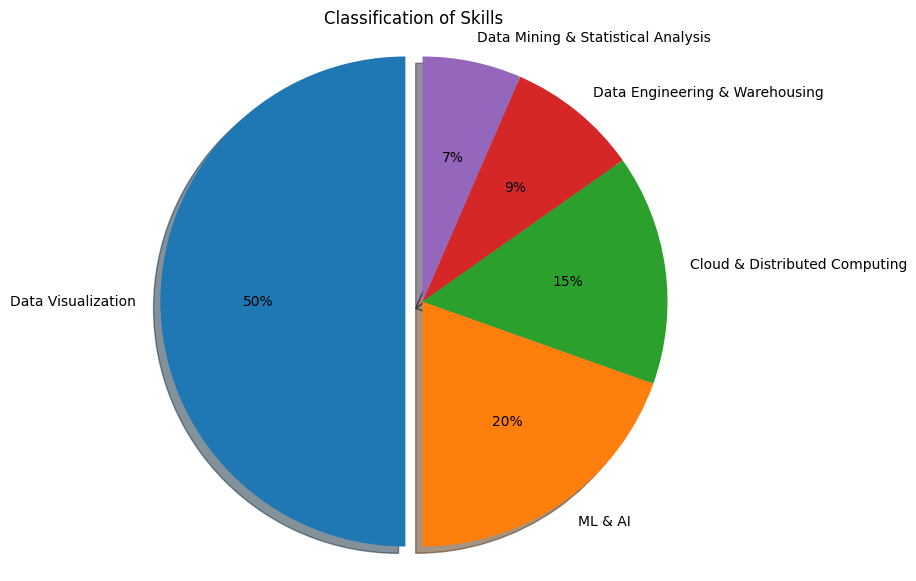

In [25]:
pie = plt.figure(figsize=(7,7))
plt.pie(summary['score'], labels=summary.index, explode = (0.07,0,0,0,0), autopct='%1.0f%%',shadow=True,startangle=90)
plt.title('Classification of Skills')
plt.axis('equal')
plt.show()

In [22]:
import pdfplumber
import spacy

def extract_text_from_pdf(file_path):
    text = ""
    with pdfplumber.open(file_path) as pdf:
        for page in pdf.pages:
            text += page.extract_text()
    return text

def parse_resume(text):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)
    education = []
    work_experience = []
    skills = []
    
    edu_keywords = ["education", "qualifications", "academic"]
    work_keywords = ["experience", "employment", "work history", "professional"]
    skill_keywords = ["skills", "technologies", "proficiencies"]
    
    current_section = None
    
    for line in text.split("\n"):
        line_lower = line.lower()
        
        if any(keyword in line_lower for keyword in edu_keywords):
            current_section = "education"
        elif any(keyword in line_lower for keyword in work_keywords):
            current_section = "work_experience"
        elif any(keyword in line_lower for keyword in skill_keywords):
            current_section = "skills"
        elif current_section == "education":
            education.append(line)
        elif current_section == "work_experience":
            work_experience.append(line)
        elif current_section == "skills":
            skills.append(line)
    
    return {
        "education": "\n".join(education),
        "work_experience": "\n".join(work_experience),
        "skills": "\n".join(skills)
    }

def generate_summary(parsed_data):
    summary = (
        f"**Education:**\n{parsed_data['education']}\n\n"
        f"**Work Experience:**\n{parsed_data['work_experience']}\n\n"
        f"**Skills:**\n{parsed_data['skills']}\n"
    )
    return summary

def generate_chatgpt_prompt(parsed_data):
    prompt = (
        "I have a resume with the following details:\n\n"
        f"**Education:**\n{parsed_data['education']}\n\n"
        f"**Work Experience:**\n{parsed_data['work_experience']}\n\n"
        f"**Skills:**\n{parsed_data['skills']}\n\n"
        "You can ask me any questions related to this resume."
    )
    return prompt

if __name__ == "__main__":
    file_path = "D:/Applications/CV/Suraj-Patil-2023-CV.pdf"  # Replace with your resume file path
    text = extract_text_from_pdf(file_path)
    parsed_data = parse_resume(text)
    summary = generate_summary(parsed_data)
    chatgpt_prompt = generate_chatgpt_prompt(parsed_data)
    
    print("Resume Summary:")
    print(summary)
    print("\nChatGPT Prompt:")
    print(chatgpt_prompt)


Resume Summary:
**Education:**
03/2022- Present Master of Engineering – Business Intelligence and Data Analytics
University of Applied Science, Emden/Leer, Germany
Grade: 2.1
Key Modules: -
• Machine Learning - Supervised Learning, Unsupervised Learning, Deep Learning
• Data Management - Data Warehousing, Data Storage, Data Lake Cloud, Data
Strategy, Data architecture, Metadata management, and Data Governance
• Digitalization & Automation - Digitalization and Networking of Industrial
Productions-Ecosystems according to the industry 4.0 specifications.
• Business Analytics – Framing, Allocating, Analytics, Preparation, Project
& Team Management,
• Computer Science – Python Programming/Coding, Software Engineering,
Algorithms, Software Patterns, MATLAB Simulations
• ERP Systems- SAP S4/HANA/ Fiori - PP, MM, SD, FI modules.
• Introduction to Data Sciences| Business management | Strategic
Management | Project T | Project B
06/2015 – 06/2019 Bachelor Study - Information Technology
Universit

In [8]:
import pdfplumber
import spacy
import pandas as pd

def extract_text_from_pdf(file_path):
    text = ""
    with pdfplumber.open(file_path) as pdf:
        for page in pdf.pages:
            text += page.extract_text()
    return text

def parse_resume(text):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)
    education = []
    work_experience = []
    skills = []
    
    edu_keywords = ["education", "qualifications", "academic"]
    work_keywords = ["experience", "employment", "work history", "professional"]
    skill_keywords = ["skills", "technologies", "proficiencies"]
    
    current_section = None
    
    for line in text.split("\n"):
        line_lower = line.lower()
        
        if any(keyword in line_lower for keyword in edu_keywords):
            current_section = "education"
        elif any(keyword in line_lower for keyword in work_keywords):
            current_section = "work_experience"
        elif any(keyword in line_lower for keyword in skill_keywords):
            current_section = "skills"
        elif current_section == "education":
            education.append(line)
        elif current_section == "work_experience":
            work_experience.append(line)
        elif current_section == "skills":
            skills.append(line)
    
    return {
        "education": education,
        "work_experience": work_experience,
        "skills": skills
    }

def generate_summary(parsed_data):
    summary = (
        f"**Education:**\n{parsed_data['education']}\n\n"
        f"**Work Experience:**\n{parsed_data['work_experience']}\n\n"
        f"**Skills:**\n{parsed_data['skills']}\n"
    )
    return summary


def create_tables(parsed_data):
    education_df = pd.DataFrame(parsed_data['education'], columns=["Education"])
    work_experience_df = pd.DataFrame(parsed_data['work_experience'], columns=["Work Experience"])
    skills_df = pd.DataFrame(parsed_data['skills'], columns=["Skills"])
    return education_df, work_experience_df, skills_df

if __name__ == "__main__":
    file_path = "D:/Applications/CV/Suraj-Patil-2023-CV.pdf"  # Replace with your resume file path
    text = extract_text_from_pdf(file_path)
    parsed_data = parse_resume(text)
    summary = generate_summary(parsed_data)
    education_df, work_experience_df, skills_df = create_tables(parsed_data)
    
    print("Resume Summary:")
    print(summary)

    
    print("\nEducation Table:")
    print(education_df)
    print("\nWork Experience Table:")
    print(work_experience_df)
    print("\nSkills Table:")
    print(skills_df)


Resume Summary:
**Education:**
['03/2022- Present Master of Engineering – Business Intelligence and Data Analytics', 'University of Applied Science, Emden/Leer, Germany', 'Grade: 2.1', 'Key Modules: -', '• Machine Learning - Supervised Learning, Unsupervised Learning, Deep Learning', '• Data Management - Data Warehousing, Data Storage, Data Lake Cloud, Data', 'Strategy, Data architecture, Metadata management, and Data Governance', '• Digitalization & Automation - Digitalization and Networking of Industrial', 'Productions-Ecosystems according to the industry 4.0 specifications.', '• Business Analytics – Framing, Allocating, Analytics, Preparation, Project', '& Team Management,', '• Computer Science – Python Programming/Coding, Software Engineering,', 'Algorithms, Software Patterns, MATLAB Simulations', '• ERP Systems- SAP S4/HANA/ Fiori - PP, MM, SD, FI modules.', '• Introduction to Data Sciences| Business management | Strategic', 'Management | Project T | Project B', '06/2015 – 06/2019